# Tourist Guide in Paris Using K-Means Clustering

## Introduction

Paris and its three surrounding departments received over 24 million visitors every year. For centuries, Paris has attracted artists from around the world, who arrive in the city to educate themselves and to seek inspiration from its vast pool of artistic resources and galleries. As a result, Paris has acquired a reputation as the "City of Art". 

It usually takes long to plan trips: we have to consider different categories of tourist attractions, art collections, museums, entertainment, outdoor activities, restaurants, etc. There is no easy way to find a visiting plan covering all tourists with different preferences. In this article, I will introduce an approach to make tourist guide for each borough in Paris using K-Means clustering, and I will also make restaurant recommendations according to cuisine types. This project might be of interest to tourists who would like to visit Paris.

## Data Collection 

We will create a dataframe with names of boroughs in Paris. Since in Paris, the numbers of boroughs are used much more often than names, we will add both number and name of boroughs to the dataframe. We will also add area size and population data into the dataframe for futher analysis.

#### Scrape data from wikipedia website

We will scrape data from wikipedia website to collect the number and name of each borough, the area size, and the population in 2017.

https://fr.wikipedia.org/wiki/Arrondissements_de_Paris

In [2]:
# import the library we use to open URLs
import urllib.request

# specify which URL/web page we are going to be scraping
url = "https://fr.wikipedia.org/wiki/Arrondissements_de_Paris"

# open the url using urllib.request and put the HTML into the page variable
page = urllib.request.urlopen(url)

# import the BeautifulSoup library so we can parse HTML and XML documents
from bs4 import BeautifulSoup

# parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(page, "lxml")

# use the 'find_all' function to bring back all instances of the 'table' tag in the HTML and store in 'all_tables' variable
all_tables=soup.find_all("table")

# Looking through the output of ”all_tables” we can again see that the class id of our chosen table is ”wikitable sortable alternance”. 
right_table=soup.find('table', class_='wikitable sortable alternance')

# Loop through the rows to get the data.
number_array = []
name_array = []
area_array = []
population_array = []

for row in right_table.findAll('tr'):
    cells = row.findAll('td')
    if len(cells) == 16:
        number_array.append(cells[0].find(text = True))
        name_array.append(cells[1].find(text = True))
        area_array.append(cells[2].find(text = True))
        population_array.append(cells[9].find(text = True))
        
print(number_array)
print(name_array)
print(area_array)
print(population_array)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']
['Louvre', 'Bourse', 'Temple', 'Hôtel-de-Ville', 'Panthéon', 'Luxembourg', 'Palais-Bourbon', 'Élysée', 'Opéra', 'Entrepôt, ', 'Popincourt', 'Reuilly', 'Gobelins', 'Observatoire', 'Vaugirard', 'Passy', 'Batignolles-Monceau', 'Buttes-Montmartre', 'Buttes-Chaumont', 'Ménilmontant']
['183', '99', '117', '160', '254', '215', '409', '388', '218', '289', '367', '637', '715', '564', '848', '791', '567', '601', '679', '598']
['16 395', '21 042', '34 389', '28 370\n', '59 631\n', '41 976\n', '52 193\n', '37 367\n', '60 071\n', '90 836\n', '147 470\n', '141 287\n', '183 399\n', '136 941\n', '235 178\n', '168 554\n', '168 737\n', '196 131\n', '188 066\n', '196 739\n']


#### parse the data to dataframe

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

paris_borough = pd.DataFrame(number_array,columns=['BoroughNumber'])
paris_borough['BoroughName'] = name_array
paris_borough['Area'] = area_array
paris_borough['Population'] = population_array

# remove the white spaces and \n in the dataframe
paris_borough.replace(to_replace=r'\n', value='', regex = True, inplace = True)
paris_borough.replace(to_replace=r' ', value='', regex = True, inplace = True)

# convert area and population to numeric values
paris_borough['BoroughNumber'] = pd.to_numeric(paris_borough['BoroughNumber'])
paris_borough['Area'] = pd.to_numeric(paris_borough['Area'])
paris_borough['Population'] = pd.to_numeric(paris_borough['Population'])

# convert the area from hectare to km2
paris_borough['Area'] = paris_borough['Area'] / 100

# calculate the population density of each borough
paris_borough['PopulationDensity'] = paris_borough['Population'] / paris_borough['Area']

# The postal code of Paris is 75001 - 75020, let's add postal code to the dataframe
paris_borough['PostalCode'] = 75000 + paris_borough['BoroughNumber']

paris_borough.head(20)

,BoroughNumber,BoroughName,Area,Population,PopulationDensity,PostalCode
0,1,Louvre,1.83,16395,8959.016393,75001
1,2,Bourse,0.99,21042,21254.545455,75002
2,3,Temple,1.17,34389,29392.307692,75003
3,4,Hôtel-de-Ville,1.60,28370,17731.250000,75004
4,5,Panthéon,2.54,59631,23476.771654,75005
5,6,Luxembourg,2.15,41976,19523.720930,75006
6,7,Palais-Bourbon,4.09,52193,12761.124694,75007
7,8,Élysée,3.88,37367,9630.670103,75008
8,9,Opéra,2.18,60071,27555.504587,75009
9,10,"Entrepôt,",2.89,90836,31431.141869,75010


#### Get the latitude and the longitude coordinates of boroughs

We will use the arcgis api in the Geocoder Python package to get the geographical coordinates of each borough. 

In [4]:
import geocoder # import geocoder

paris_borough['Latitude'] = ""
paris_borough['Longitude'] = ""

for index, row in paris_borough.iterrows():
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Paris, France'.format(row['PostalCode']))
        lat_lng_coords = g.latlng
        #print( g, lat_lng_coords)
    paris_borough.iloc[index, 6] = lat_lng_coords[0]
    paris_borough.iloc[index, 7] = lat_lng_coords[1]

paris_borough.head(20)

,BoroughNumber,BoroughName,Area,Population,PopulationDensity,PostalCode,Latitude,Longitude
0,1,Louvre,1.83,16395,8959.016393,75001,48.8634,2.33677
1,2,Bourse,0.99,21042,21254.545455,75002,48.8677,2.34309
2,3,Temple,1.17,34389,29392.307692,75003,48.8626,2.35905
3,4,Hôtel-de-Ville,1.60,28370,17731.250000,75004,48.8543,2.36147
4,5,Panthéon,2.54,59631,23476.771654,75005,48.8454,2.35189
5,6,Luxembourg,2.15,41976,19523.720930,75006,48.8493,2.3321
6,7,Palais-Bourbon,4.09,52193,12761.124694,75007,48.8546,2.31306
7,8,Élysée,3.88,37367,9630.670103,75008,48.8729,2.31125
8,9,Opéra,2.18,60071,27555.504587,75009,48.877,2.33789
9,10,"Entrepôt,",2.89,90836,31431.141869,75010,48.8762,2.36233


Import libraries 

In [5]:
import json # library to handle JSON files

import numpy as np

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt 

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

#### Use geopy library to get the latitude and longitude values of Paris.

In [6]:
address = 'Paris ,France'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of France are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of France are 48.8566969, 2.3514616.


##### Create a map of Paris with boroughs superimposed on top.

In [7]:
# create map of Paris using latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, number, name in zip(paris_borough['Latitude'], paris_borough['Longitude'], paris_borough['BoroughNumber'], paris_borough['BoroughName']):
    label = '{}, {}'.format(number, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris)  
    
map_paris

## Restaurant recommendation 

Let's continue by analysing restoration data and make some recommendations of restaurant for tourists. The objective is to categorize he speciaties in each borough so that a tourist can choose a place according to his/her food pereferences.

Define Foursquare Credentials and Version

In [8]:
CLIENT_ID = '*****************' # your Foursquare ID
CLIENT_SECRET = '****************************' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

Let's create a function to repeat the same process to all the boroughs in Paris according to borough number, location, searching radius, and categories.

In [9]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

def getNearbyVenues(numbers, latitudes, longitudes, radius, category):
    
    venues_list=[]
    for number, lat, lng in zip(numbers, latitudes, longitudes):
        # print(number)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            category,
            radius[number - 1], 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            number, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['BoroughNumber', 
                  'BoroughLatitude', 
                  'BoroughLongitude', 
                  'Venue', 
                  'VenueLatitude', 
                  'VenueLongitude', 
                  'VenueCategory']
    
    return(nearby_venues)

#### Create a dataframe for restoration venues

We will collect all restoration venues in paris_venues using Foursquare API.

According to the area size of each borough in Paris, we will use 400 meters as radius for borough 1 - 4, 500 meters as radius for borough 5, 6, 9, 10, 600 meters as radius for borough 7, 8, 11, and 750 meters as radius for borough 13, 14, 15, 17, 18, 19, 20. since borough 12 and 16 contain forests, which are larger than other boroughs, we will use 1500 meters as radius.

In [10]:
radius_array = [400, 400, 400, 400, 500, 500, 600, 600, 500, 500, 600, 1500, 750, 750, 750, 1500, 750, 750, 750, 750]

paris_restaurants = getNearbyVenues(numbers=paris_borough['BoroughNumber'],
                                   latitudes=paris_borough['Latitude'],
                                   longitudes=paris_borough['Longitude'],
                                   radius=radius_array,
                                   category='4d4b7105d754a06374d81259'
                                  )

Let's find out how many unique categories of restaurant from all the returned venues

In [11]:
paris_restaurants_groupby = paris_restaurants.groupby(by = 'VenueCategory').count().sort_values(by = 'BoroughNumber', ascending = False)
paris_restaurants_groupby.head(5)

,BoroughNumber,BoroughLatitude,BoroughLongitude,Venue,VenueLatitude,VenueLongitude
VenueCategory,,,,,,
French Restaurant,356,356,356,356,356,356
Italian Restaurant,135,135,135,135,135,135
Bakery,87,87,87,87,87,87
Japanese Restaurant,85,85,85,85,85,85
Café,83,83,83,83,83,83


There are some cuisine categories which belong to others: ‘Creperie’ is a type of French cuisine; ‘Sushi ’ is a type of Japanese cuisine; ‘Pizza’ is a type of Italian cuisine, etc. Therefore, we will group the categories which are the same type of cuisine.

We will merge Sushi Restaurant into Japanese Restaurant categorie, Pizza Place into Italian Restaurant, Creperie into French Restaurant.

In [12]:
paris_restaurants.replace(to_replace='Sushi Restaurant', value='Japanese Restaurant', inplace = True)
paris_restaurants.replace(to_replace='Pizza Place', value='Italian Restaurant', inplace = True)
paris_restaurants.replace(to_replace='Creperie', value='French Restaurant', inplace = True)
paris_restaurants_groupby = paris_restaurants.groupby(by = 'VenueCategory').count().sort_values(by = 'BoroughNumber', ascending = False)

We will remove all categories with less than 15 restaurants in the dataframe, we will also remove catecories such as 'Restaurant', 'Diner', 'Breakfast Spot' which don't represent any specific category. Since we can not categorize Asian Restaurant, Burger Joint, Sandwich Place and Seafood Restaurant as a cuisine of a contry, we will also drop those columns. 

In [13]:
restaurant_types = paris_restaurants_groupby[paris_restaurants_groupby['BoroughNumber'] >= 15].index.values

drop_cat = np.array(['Restaurant', 'Diner', 'Breakfast Spot', 'Café', 'Bakery', 'Bistro', 'Brasserie', 'Gastropub','Burger Joint','Asian Restaurant', 'Seafood Restaurant', 'Sandwich Place']) 
restaurant_types = restaurant_types[~np.isin(restaurant_types, drop_cat)]
    
paris_restau_select = paris_restaurants[paris_restaurants.VenueCategory.isin(restaurant_types)]

print(restaurant_types)

['French Restaurant' 'Italian Restaurant' 'Japanese Restaurant'
 'Vietnamese Restaurant' 'Thai Restaurant' 'Chinese Restaurant'
 'Korean Restaurant' 'Indian Restaurant']


Let's check the new paris_restaurants_groupby dataframe

In [14]:
paris_restau_select_groupby = paris_restau_select.groupby(by = 'VenueCategory').count().sort_values(by = 'BoroughNumber', ascending = False)
paris_restau_select_groupby

,BoroughNumber,BoroughLatitude,BoroughLongitude,Venue,VenueLatitude,VenueLongitude
VenueCategory,,,,,,
French Restaurant,379,379,379,379,379,379
Italian Restaurant,169,169,169,169,169,169
Japanese Restaurant,115,115,115,115,115,115
Vietnamese Restaurant,39,39,39,39,39,39
Thai Restaurant,32,32,32,32,32,32
Chinese Restaurant,28,28,28,28,28,28
Korean Restaurant,21,21,21,21,21,21
Indian Restaurant,20,20,20,20,20,20


#### One hot encoding for all selected restaurant categories

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [15]:
# one hot encoding
paris_restau_onehot = pd.get_dummies(paris_restau_select[['VenueCategory']], prefix="", prefix_sep="")

# add BoroughNumber column back to dataframe
paris_restau_onehot['BoroughNumber'] = paris_restau_select['BoroughNumber'] 

# move BoroughNumber column to the first column
paris_restau_onehot = paris_restau_onehot.set_index(['BoroughNumber']).reset_index()

print(paris_restau_onehot.shape)
paris_restau_onehot.head()

(803, 9)


,BoroughNumber,Chinese Restaurant,French Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Thai Restaurant,Vietnamese Restaurant
0,1,0,0,0,1,0,0,0,0
1,1,0,1,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0
4,1,0,0,0,0,1,0,0,0


Next, let's group rows by borough and calculate the mean of the frequency of occurrence of each category.

In [16]:
paris_restau_onehot_grouped = paris_restau_onehot.groupby('BoroughNumber').sum().reset_index()
borough_numbers = paris_restau_onehot_grouped['BoroughNumber']
paris_restau_onehot_grouped.drop(columns=['BoroughNumber'], inplace = True)
paris_restau_onehot_grouped = paris_restau_onehot_grouped.div(paris_restau_onehot_grouped.sum(axis=0), axis=1)
paris_restau_onehot_grouped['BoroughNumber'] = borough_numbers
fixed_columns = [paris_restau_onehot_grouped.columns[-1]] + list(paris_restau_onehot_grouped.columns[:-1])
paris_restau_onehot_grouped = paris_restau_onehot_grouped[fixed_columns]
paris_restau_onehot_grouped.head(20)

,BoroughNumber,Chinese Restaurant,French Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Thai Restaurant,Vietnamese Restaurant
0,1,0.035714,0.031662,0.00,0.041420,0.086957,0.095238,0.06250,0.000000
1,2,0.035714,0.060686,0.10,0.076923,0.034783,0.000000,0.09375,0.025641
2,3,0.214286,0.018470,0.00,0.029586,0.043478,0.047619,0.03125,0.076923
3,4,0.000000,0.050132,0.00,0.047337,0.043478,0.000000,0.09375,0.000000
4,5,0.035714,0.079156,0.00,0.059172,0.034783,0.047619,0.00000,0.102564
5,6,0.035714,0.039578,0.00,0.053254,0.026087,0.047619,0.00000,0.000000
6,7,0.035714,0.081794,0.00,0.041420,0.026087,0.047619,0.00000,0.000000
7,8,0.035714,0.065963,0.05,0.041420,0.043478,0.047619,0.03125,0.000000
8,9,0.035714,0.073879,0.00,0.029586,0.086957,0.047619,0.00000,0.025641
9,10,0.000000,0.052770,0.10,0.053254,0.034783,0.095238,0.09375,0.000000


We will sort the top 3 boroughs with the most number of restaurants for each restaurant category. We will create the transpose of the paris_restau_onehot_grouped dataframe.

In [17]:
paris_restau_transposed = paris_restau_onehot_grouped.set_index(['BoroughNumber']).T
paris_restau_transposed.head(8)

BoroughNumber,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Chinese Restaurant,0.035714,0.035714,0.214286,0.000000,0.035714,0.035714,0.035714,0.035714,0.035714,0.000000,0.035714,0.000000,0.214286,0.071429,0.000000,0.035714,0.071429,0.000000,0.035714,0.071429
French Restaurant,0.031662,0.060686,0.018470,0.050132,0.079156,0.039578,0.081794,0.065963,0.073879,0.052770,0.023747,0.010554,0.036939,0.076517,0.055409,0.071240,0.055409,0.044855,0.036939,0.034301
Indian Restaurant,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.100000,0.050000,0.050000,0.100000,0.200000,0.150000,0.000000,0.050000,0.100000,0.000000,0.050000
Italian Restaurant,0.041420,0.076923,0.029586,0.047337,0.059172,0.053254,0.041420,0.041420,0.029586,0.053254,0.053254,0.029586,0.023669,0.059172,0.076923,0.059172,0.100592,0.059172,0.035503,0.029586
Japanese Restaurant,0.086957,0.034783,0.043478,0.043478,0.034783,0.026087,0.026087,0.043478,0.086957,0.034783,0.026087,0.034783,0.078261,0.060870,0.069565,0.043478,0.086957,0.017391,0.034783,0.086957
Korean Restaurant,0.095238,0.000000,0.047619,0.000000,0.047619,0.047619,0.047619,0.047619,0.047619,0.095238,0.047619,0.047619,0.000000,0.095238,0.238095,0.000000,0.047619,0.000000,0.000000,0.047619
Thai Restaurant,0.062500,0.093750,0.031250,0.093750,0.000000,0.000000,0.000000,0.031250,0.000000,0.093750,0.000000,0.031250,0.343750,0.093750,0.093750,0.031250,0.000000,0.000000,0.000000,0.000000
Vietnamese Restaurant,0.000000,0.025641,0.076923,0.000000,0.102564,0.000000,0.000000,0.000000,0.025641,0.000000,0.051282,0.000000,0.487179,0.076923,0.051282,0.000000,0.000000,0.051282,0.051282,0.000000


First, let's write a function to sort the venues in descending order.

In [18]:
def return_top_boroughs(row, num_top_boroughs):
    row_boroughs = row.iloc[1:]
    row_boroughs_sorted = row_boroughs.sort_values(ascending=False)
    return row_boroughs_sorted.index.values[0:num_top_boroughs]

Let's write a function to get the percentage of a cuisine in a borough among all boroughs

In [19]:
def return_percentage_cuisine(cuisine, borough):
    return paris_restau_transposed.loc[cuisine, borough]

Now let's create the new dataframe paris_cuisine_boroughs_sorted and display the top 3 boroughs with the most number of restaurants for each restaurant category. 

In [20]:
num_top_boroughs = 3

indicators = ['st', 'nd', 'rd']
columns = []
for ind in np.arange(num_top_boroughs):
    try:
        columns.append('{}{} Borough'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Borough'.format(ind+1))

for ind in np.arange(num_top_boroughs):
    try:
        columns.append('{}{} Borough Percentage'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Borough Percentage'.format(ind+1))
        
# create a new dataframe
paris_cuisine_boroughs_sorted = pd.DataFrame(columns=columns,index=paris_restau_transposed.index)

for ind in np.arange(paris_restau_transposed.shape[0]):
    paris_cuisine_boroughs_sorted.iloc[ind, :num_top_boroughs] = return_top_boroughs(paris_restau_transposed.iloc[ind, :], num_top_boroughs)

# get percentage of each borough 
for ind, index_name in zip(np.arange(paris_cuisine_boroughs_sorted.shape[0]), paris_cuisine_boroughs_sorted.index) :
    for col in np.arange(num_top_boroughs):
        paris_cuisine_boroughs_sorted.iloc[ind, col + 3] = return_percentage_cuisine(index_name, paris_cuisine_boroughs_sorted.iloc[ind, col])
    
paris_cuisine_boroughs_sorted.head(8)

,1st Borough,2nd Borough,3rd Borough,1st Borough Percentage,2nd Borough Percentage,3rd Borough Percentage
Chinese Restaurant,3,13,20,0.214286,0.214286,0.0714286
French Restaurant,7,5,14,0.0817942,0.0791557,0.0765172
Indian Restaurant,14,15,2,0.2,0.15,0.1
Italian Restaurant,17,2,15,0.100592,0.0769231,0.0769231
Japanese Restaurant,20,9,17,0.0869565,0.0869565,0.0869565
Korean Restaurant,15,10,14,0.238095,0.0952381,0.0952381
Thai Restaurant,13,2,4,0.34375,0.09375,0.09375
Vietnamese Restaurant,13,5,3,0.487179,0.102564,0.0769231


Let's plot the graph with matplotlib library.

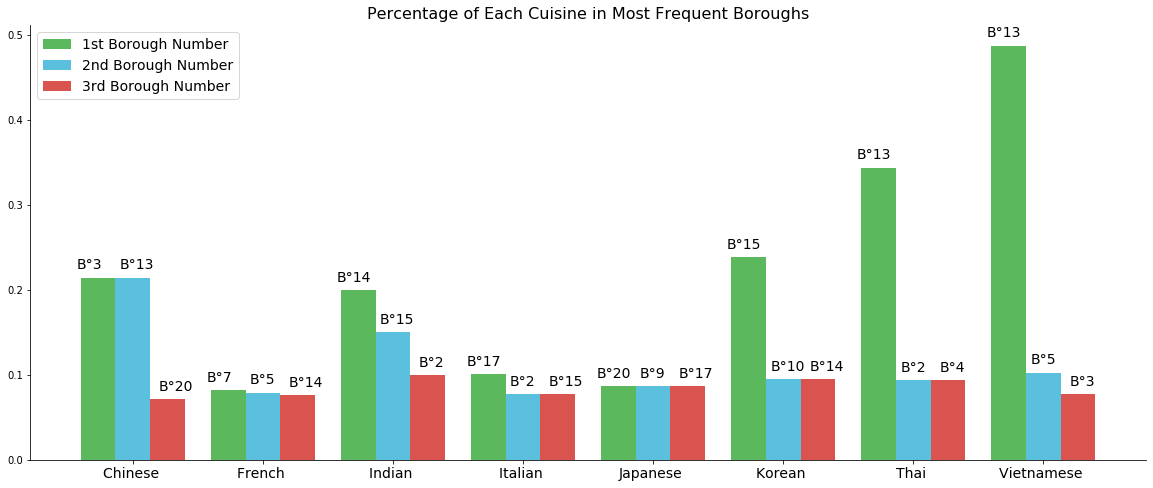

In [21]:
import matplotlib
matplotlib.rcParams['axes.spines.left'] = True
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False

# set width of bar
barWidth = 0.8

# get borough numbers 
borough1 = paris_cuisine_boroughs_sorted['1st Borough']
borough2 = paris_cuisine_boroughs_sorted['2nd Borough']
borough3 = paris_cuisine_boroughs_sorted['3rd Borough']

# set height of bar
percentage1 = paris_cuisine_boroughs_sorted['1st Borough Percentage']
percentage2 = paris_cuisine_boroughs_sorted['2nd Borough Percentage']
percentage3 = paris_cuisine_boroughs_sorted['3rd Borough Percentage']

# Set position of bar on X axis
r1 = np.arange(len(percentage1))*3
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Figure size
plt.figure(figsize=(20,8))

# Make the plot
plt.bar(r1, percentage1, color='#5cb85c', width=barWidth, label='1st Borough Number')
plt.bar(r2, percentage2, color='#5bc0de', width=barWidth, label='2nd Borough Number')
plt.bar(r3, percentage3, color='#d9534f', width=barWidth, label='3rd Borough Number')
 
# Add xticks on the middle of the group bars
plt.title('Percentage of Each Cuisine in Most Frequent Boroughs', fontsize=16)
plt.xticks([r + barWidth for r in r1], [cuisine.replace('Restaurant', '') for cuisine in paris_cuisine_boroughs_sorted.index], fontsize=14)

# annotate values
for index,percentage1,percentage2,percentage3,borough1,borough2,borough3 in zip(range(len(percentage1)),percentage1,percentage2,percentage3,borough1,borough2,borough3): 
    label1 = 'B°' + str(borough1)
    label2 = 'B°' + str(borough2)
    label3 = 'B°' + str(borough3)
    plt.annotate(label1, xy=(r1[index] - 0.5, percentage1 + 0.01), color='black', fontsize=14)
    plt.annotate(label2, xy=(r2[index] - 0.3, percentage2 + 0.01), color='black', fontsize=14)
    plt.annotate(label3, xy=(r3[index] - 0.2, percentage3 + 0.01), color='black', fontsize=14)

# Create legend & Show graphic
plt.legend(fontsize=14)
plt.show()

We can tell that almost half of Vietnamese restaurants, a third of Thai restaurants and a quarter of Chinese restaurants are located in the borough 13, because there are a lot of Asian neighborhoods located in the borough 13; 20 percent of Indian restaurants are located in the borough 14, and a quarter of Korean restaurants are located in the borough 15.

Now we will use box plot to visualize the percentage distribution for each cuisine category. 

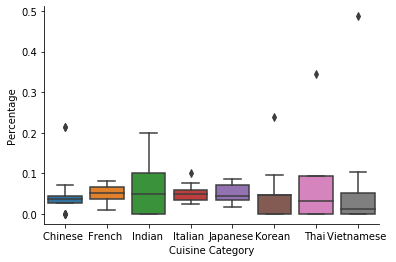

In [33]:
import seaborn as sns

df = pd.DataFrame(data = np.random.random(size=(4,4)), columns = ['A','B','C','D'])

df_boxpolt = paris_restau_onehot_grouped[['Chinese Restaurant','French Restaurant','Indian Restaurant','Italian Restaurant','Japanese Restaurant','Korean Restaurant','Thai Restaurant','Vietnamese Restaurant']]

ax = sns.boxplot(x="variable", y="value", data=pd.melt(df_boxpolt))
ax.set(xlabel='Cuisine Category', ylabel='Percentage')
ax.set_xticklabels([cuisine.replace('Restaurant', '') for cuisine in paris_cuisine_boroughs_sorted.index])
plt.show()

We can tell that on one hand, restaurants for French cuisine, Italian cuisine and Japanese cuisine are evenly distributed in the city because they have small inter quartile range and few outliers; on the other hand, restaurants for Chinese cuisine, Indian cuisine, Korean cuisine, Thai cuisine and Vietnamese cuisine are likely located in specific boroughs in the city because they have large inter quartile range and more outliers.

## Tourist attractions  recommendation

Now we will gather data from foursquare API to make some recommendations for tourist attractions.

#### Explore venues in each borough

We will select several branches from the foursuqare venue categories list: 

arts and entertainment, outdoors and recreation, spiritual center, clothing store. 

Due to the limitation of number of results returned by Foursquare API, We will create a dataframe for each branch and get venues for each borough.

In [248]:
radius_array = [400, 400, 400, 400, 500, 500, 600, 600, 500, 500, 600, 1500, 750, 750, 750, 1500, 750, 750, 750, 750]

branch_arts_entertainment = '4d4b7104d754a06370d81259'
branch_outdoors_recreation = '4d4b7105d754a06377d81259'
branch_spiritual_center = '4bf58dd8d48988d131941735'
branch_clothing_store = '4bf58dd8d48988d103951735'

paris_arts_entertainment = getNearbyVenues(numbers=paris_borough['BoroughNumber'],
                                   latitudes=paris_borough['Latitude'],
                                   longitudes=paris_borough['Longitude'],
                                   radius=radius_array,
                                   category=branch_arts_entertainment
                                  )

paris_outdoors_recreation = getNearbyVenues(numbers=paris_borough['BoroughNumber'],
                                   latitudes=paris_borough['Latitude'],
                                   longitudes=paris_borough['Longitude'],
                                   radius=radius_array,
                                   category=branch_outdoors_recreation
                                  )

paris_spiritual_center = getNearbyVenues(numbers=paris_borough['BoroughNumber'],
                                   latitudes=paris_borough['Latitude'],
                                   longitudes=paris_borough['Longitude'],
                                   radius=radius_array,
                                   category=branch_spiritual_center
                                  )

paris_clothing_store = getNearbyVenues(numbers=paris_borough['BoroughNumber'],
                                   latitudes=paris_borough['Latitude'],
                                   longitudes=paris_borough['Longitude'],
                                   radius=radius_array,
                                   category=branch_clothing_store
                                  )


Let's find out how many venues are found for each branch.

In [443]:
print('There are {} venues in branch arts and entertainment.'.format(paris_arts_entertainment.shape[0]))
print('There are {} venues in branch outdoors and recreation.'.format(paris_outdoors_recreation.shape[0]))
print('There are {} venues in branch spiritual center.'.format(paris_spiritual_center.shape[0]))
print('There are {} venues in branch clothing store.'.format(paris_clothing_store.shape[0]))

# paris_clothing_store.groupby('BoroughNumber').count()

There are 224 venues in branch arts and entertainment.
There are 463 venues in branch outdoors and recreation.
There are 86 venues in branch spiritual center.
There are 420 venues in branch clothing store.


Let's find out how many unique categories in each branch.

In [444]:
print('There are {} uniques categories in branch arts and entertainment.'.format(len(paris_arts_entertainment['VenueCategory'].unique())))
print('There are {} uniques categories in branch outdoors and recreation.'.format(len(paris_outdoors_recreation['VenueCategory'].unique())))
print('There are {} uniques categories in branch spiritual center.'.format(len(paris_spiritual_center['VenueCategory'].unique())))
print('There are {} uniques categories in branch clothing store.'.format(len(paris_clothing_store['VenueCategory'].unique())))

There are 25 uniques categories in branch arts and entertainment.
There are 46 uniques categories in branch outdoors and recreation.
There are 10 uniques categories in branch spiritual center.
There are 21 uniques categories in branch clothing store.


Now we will merge all branches into one dataframe paris_venues, which contains all venues of all categories.

In [445]:
paris_venues = pd.concat([paris_arts_entertainment, paris_outdoors_recreation, paris_spiritual_center, paris_clothing_store])
print(paris_venues.shape)
paris_venues.head()

(1193, 7)


,BoroughNumber,BoroughLatitude,BoroughLongitude,Venue,VenueLatitude,VenueLongitude,VenueCategory
0,1,48.863415,2.336771,Comédie-Française,48.863088,2.336612,Theater
1,1,48.863415,2.336771,Les Arts Décoratifs,48.863077,2.333393,Art Museum
2,1,48.863415,2.336771,Musée du Louvre,48.860847,2.336440,Art Museum
3,1,48.863415,2.336771,Théâtre du Palais-Royal,48.866005,2.337685,Theater
4,1,48.863415,2.336771,La Vénus de Milo (Vénus de Milo),48.859943,2.337234,Exhibit


In [446]:
# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['VenueCategory']], prefix="", prefix_sep="")

# add borough number column back to dataframe
paris_onehot['BoroughNumber'] = paris_venues['BoroughNumber'] 

# move neighborhood column to the first column
paris_onehot = paris_onehot.set_index(['BoroughNumber']).reset_index()

print(paris_onehot.shape)
paris_onehot.head()

(1193, 102)


,BoroughNumber,Accessories Store,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Athletics & Sports,Baby Store,Baseball Field,Basketball Court,Bathing Area,Bike Trail,Botanical Garden,Boutique,Boxing Gym,Buddhist Temple,Canal,Canal Lock,Castle,Church,Circus,Clothing Store,Comedy Club,Concert Hall,Cycle Studio,Dance Studio,Design Studio,Exhibit,Farm,Forest,Fountain,Furniture / Home Store,Garden,Gift Shop,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Indie Movie Theater,Jazz Club,Jewelry Store,Kids Store,Lake,Laser Tag,Lighthouse,Lingerie Store,Martial Arts Dojo,Mattress Store,Memorial Site,Men's Store,Miscellaneous Shop,Monastery,Mosque,Movie Theater,Multiplex,Museum,Music Venue,National Park,Optical Shop,Outdoor Sculpture,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pilates Studio,Playground,Plaza,Pool,Public Art,Racecourse,Recreation Center,River,Roof Deck,Salon / Barbershop,Scenic Lookout,Science Museum,Sculpture Garden,Shoe Store,Shrine,Skate Park,Skating Rink,Soccer Field,Spiritual Center,Sporting Goods Shop,Sports Club,Squash Court,Street Art,Synagogue,Tailor Shop,Temple,Tennis Court,Theater,Track,Trail,Vineyard,Waterfall,Women's Store,Yoga Studio,Zoo Exhibit
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Let's check how many venues were returned for each borough

In [447]:
paris_venues.groupby('BoroughNumber').count()

,BoroughLatitude,BoroughLongitude,Venue,VenueLatitude,VenueLongitude,VenueCategory
BoroughNumber,,,,,,
1,69,69,69,69,69,69
2,70,70,70,70,70,70
3,68,68,68,68,68,68
4,97,97,97,97,97,97
5,46,46,46,46,46,46
6,86,86,86,86,86,86
7,31,31,31,31,31,31
8,85,85,85,85,85,85
9,46,46,46,46,46,46


#### One hot encoding for all categories

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

Let's perform one hot encoding for the dataframe paris_venues.

In [448]:
# one hot encoding
paris_venues_onehot = pd.get_dummies(paris_venues[['VenueCategory']], prefix="", prefix_sep="")

# add borough number column back to dataframe
paris_venues_onehot['BoroughNumber'] = paris_venues['BoroughNumber'] 

# move neighborhood column to the first column
paris_venues_onehot = paris_venues_onehot.set_index(['BoroughNumber']).reset_index()

print(paris_venues_onehot.shape)
paris_venues_onehot.head()

(1193, 102)


,BoroughNumber,Accessories Store,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Athletics & Sports,Baby Store,Baseball Field,Basketball Court,Bathing Area,Bike Trail,Botanical Garden,Boutique,Boxing Gym,Buddhist Temple,Canal,Canal Lock,Castle,Church,Circus,Clothing Store,Comedy Club,Concert Hall,Cycle Studio,Dance Studio,Design Studio,Exhibit,Farm,Forest,Fountain,Furniture / Home Store,Garden,Gift Shop,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Indie Movie Theater,Jazz Club,Jewelry Store,Kids Store,Lake,Laser Tag,Lighthouse,Lingerie Store,Martial Arts Dojo,Mattress Store,Memorial Site,Men's Store,Miscellaneous Shop,Monastery,Mosque,Movie Theater,Multiplex,Museum,Music Venue,National Park,Optical Shop,Outdoor Sculpture,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pilates Studio,Playground,Plaza,Pool,Public Art,Racecourse,Recreation Center,River,Roof Deck,Salon / Barbershop,Scenic Lookout,Science Museum,Sculpture Garden,Shoe Store,Shrine,Skate Park,Skating Rink,Soccer Field,Spiritual Center,Sporting Goods Shop,Sports Club,Squash Court,Street Art,Synagogue,Tailor Shop,Temple,Tennis Court,Theater,Track,Trail,Vineyard,Waterfall,Women's Store,Yoga Studio,Zoo Exhibit
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Let's group by vanues by categories and remove categories with less than 5 venues.

In [449]:
paris_venues_groupby = paris_venues.groupby(by = 'VenueCategory').count().sort_values(by = 'BoroughNumber', ascending = False)

venues_categories = paris_venues_groupby[paris_venues_groupby['BoroughNumber'] >= 5].index.values

print(len(venues_categories))
print(venues_categories)

41
['Plaza' 'Clothing Store' 'Church' 'Shoe Store' 'Park' 'Art Gallery'
 'Boutique' 'Garden' "Women's Store" "Men's Store" 'Kids Store'
 'Gym / Fitness Center' 'Theater' 'Gym' 'Tennis Court' 'Art Museum'
 'Optical Shop' 'Accessories Store' 'Dance Studio' 'Pool' 'Lingerie Store'
 'Museum' 'Yoga Studio' 'Athletics & Sports' 'Comedy Club'
 'Pedestrian Plaza' 'Playground' 'Exhibit' 'Performing Arts Venue'
 'Fountain' 'Music Venue' 'Spiritual Center' 'History Museum'
 'Movie Theater' 'Martial Arts Dojo' 'Outdoor Sculpture'
 'Indie Movie Theater' 'Concert Hall' 'Baby Store' 'Multiplex' 'Lake']


Now we can see that in the category list, there are a lot of similar categories that can be grouped. So we will group Shoe Store, Women's Store, Men's Store, Kids Store, Boutique, Lingerie Store, Baby Store, Accessories Store into Clothing Store; group Art Gallery, Art Museum, Museum, History Museum, Spiritual Center, Exhibit into Art and Museum; group Gym / Fitness Center, Gym, Tennis Court, Pool, Yoga Studio, Athletics & Sports, Martial Arts Dojo into Sport; group Performing Arts Venue, Theater, Dance Studio, Movie Theater, Music Venue, Indie Movie Theater, Concert Hall, Comedy Club into Entertainment; group Garden, Park, Playground, Fountain, Outdoor Sculpture, Lake into Outdoors and Nature; group Pedestrian Plaza into Plaza; drop Optical Shop and Multiplex.


In [450]:
paris_venues_select = paris_venues

drop_cat = np.array(['Optical Shop', 'Multiplex']) 
paris_venues_select = paris_venues[~paris_venues.VenueCategory.isin(drop_cat)]

paris_venues_select.replace(to_replace=['Shoe Store', "Women's Store", "Men's Store", 'Kids Store', 'Boutique', 'Lingerie Store', 'Baby Store', 'Accessories Store'], value='Clothing Store', inplace = True)
paris_venues_select.replace(to_replace=['Art Gallery', 'Art Museum', 'Museum', 'History Museum', 'Spiritual Center', 'Exhibit'], value='Art and Museum', inplace = True)
paris_venues_select.replace(to_replace=['Gym / Fitness Center', 'Gym', 'Tennis Court', 'Pool', 'Yoga Studio', 'Athletics & Sports', 'Martial Arts Dojo'], value='Sport', inplace = True)
paris_venues_select.replace(to_replace=['Performing Arts Venue', 'Theater', 'Dance Studio', 'Movie Theater', 'Music Venue', 'Indie Movie Theater', 'Concert Hall', 'Comedy Club'], value='Entertainment', inplace = True)
paris_venues_select.replace(to_replace=['Garden', 'Park', 'Playground', 'Fountain', 'Outdoor Sculpture', 'Lake'], value='Outdoors and Nature', inplace = True)
paris_venues_select.replace(to_replace=['Pedestrian Plaza'], value='Plaza', inplace = True)




C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [451]:
paris_venues_select_groupby = paris_venues_select.groupby(by = 'VenueCategory').count().sort_values(by = 'BoroughNumber', ascending = False)

venues_select_categories = paris_venues_select_groupby[paris_venues_select_groupby['BoroughNumber'] >= 5].index.values

#paris_venues_select = paris_venues_select.drop(paris_venues_select[~paris_venues_select.VenueCategory.isin(venues_select_categories)].index)

paris_venues_select = paris_venues_select[paris_venues_select.VenueCategory.isin(venues_select_categories)]

print(len(venues_select_categories))
print(venues_select_categories)

7
['Clothing Store' 'Sport' 'Plaza' 'Outdoors and Nature' 'Art and Museum'
 'Entertainment' 'Church']


Let's check how many venues in each category

In [452]:
print('There are {} venues in category Clothing Store.'.format(sum(paris_venues_select['VenueCategory'] =='Clothing Store')))
print('There are {} venues in category Sport.'.format(sum(paris_venues_select['VenueCategory'] =='Sport')))
print('There are {} venues in category Plaza.'.format(sum(paris_venues_select['VenueCategory'] =='Plaza')))
print('There are {} venues in category Outdoors and Nature.'.format(sum(paris_venues_select['VenueCategory'] =='Outdoors and Nature')))
print('There are {} venues in category Art and Museum.'.format(sum(paris_venues_select['VenueCategory'] =='Art and Museum')))
print('There are {} venues in category Entertainment.'.format(sum(paris_venues_select['VenueCategory'] =='Entertainment')))
print('There are {} venues in category Church.'.format(sum(paris_venues_select['VenueCategory'] =='Church')))


There are 384 venues in category Clothing Store.
There are 137 venues in category Sport.
There are 136 venues in category Plaza.
There are 130 venues in category Outdoors and Nature.
There are 110 venues in category Art and Museum.
There are 92 venues in category Entertainment.
There are 62 venues in category Church.


Now, let's redo on hot encoding for the selected dataframe

In [453]:
# one hot encoding
paris_venues_select_onehot = pd.get_dummies(paris_venues_select[['VenueCategory']], prefix="", prefix_sep="")

# add borough number column back to dataframe
paris_venues_select_onehot['BoroughNumber'] = paris_venues_select['BoroughNumber'] 

# move neighborhood column to the first column
paris_venues_select_onehot = paris_venues_select_onehot.set_index(['BoroughNumber']).reset_index()

print(paris_venues_select_onehot.shape)
paris_venues_select_onehot.head()

(1051, 8)


,BoroughNumber,Art and Museum,Church,Clothing Store,Entertainment,Outdoors and Nature,Plaza,Sport
0,1,0,0,0,1,0,0,0
1,1,1,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0
4,1,1,0,0,0,0,0,0


Next, let's group rows by borough and by taking the mean of the frequency of occurrence of each category.

We calculate the percentage of each borough for all categories.

In [454]:
paris_venues_select_onehot_grouped = paris_venues_select_onehot.groupby('BoroughNumber').sum().reset_index()
borough_numbers = paris_venues_select_onehot_grouped['BoroughNumber']
paris_venues_select_onehot_grouped.drop(columns=['BoroughNumber'], inplace = True)
paris_venues_select_onehot_grouped = paris_venues_select_onehot_grouped.div(paris_venues_select_onehot_grouped.sum(axis=0), axis=1)
paris_venues_select_onehot_grouped['BoroughNumber'] = borough_numbers
fixed_columns = [paris_venues_select_onehot_grouped.columns[-1]] + list(paris_venues_select_onehot_grouped.columns[:-1])
paris_venues_select_onehot_grouped = paris_venues_select_onehot_grouped[fixed_columns]
paris_venues_select_onehot_grouped.head(20)

,BoroughNumber,Art and Museum,Church,Clothing Store,Entertainment,Outdoors and Nature,Plaza,Sport
0,1,0.136364,0.032258,0.067708,0.032609,0.038462,0.088235,0.014599
1,2,0.018182,0.080645,0.085938,0.097826,0.007692,0.051471,0.058394
2,3,0.163636,0.032258,0.101562,0.010870,0.030769,0.000000,0.014599
3,4,0.090909,0.016129,0.132812,0.043478,0.107692,0.051471,0.014599
4,5,0.045455,0.096774,0.007812,0.065217,0.038462,0.073529,0.021898
5,6,0.072727,0.048387,0.111979,0.086957,0.076923,0.051471,0.043796
6,7,0.072727,0.032258,0.002604,0.010870,0.061538,0.066176,0.000000
7,8,0.109091,0.032258,0.117188,0.065217,0.023077,0.044118,0.029197
8,9,0.054545,0.032258,0.020833,0.065217,0.015385,0.036765,0.043796
9,10,0.018182,0.016129,0.026042,0.000000,0.046154,0.029412,0.014599


We will sort the most common categories of venues in each borough. We will create the new dataframe and display the top 10 categories for each borough.

In [455]:
num_top_venues = 7

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['BoroughNumber']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
paris_venues_select_sorted = pd.DataFrame(columns=columns)
paris_venues_select_sorted['BoroughNumber'] = paris_venues_select_onehot_grouped['BoroughNumber']

for ind in np.arange(paris_venues_select_onehot_grouped.shape[0]):
    paris_venues_select_sorted.iloc[ind, 1:] = return_most_common_venues(paris_venues_select_onehot_grouped.iloc[ind, :], num_top_venues)

paris_venues_select_sorted.head(20)

,BoroughNumber,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,1,Art and Museum,Plaza,Clothing Store,Outdoors and Nature,Entertainment,Church,Sport
1,2,Entertainment,Clothing Store,Church,Sport,Plaza,Art and Museum,Outdoors and Nature
2,3,Art and Museum,Clothing Store,Church,Outdoors and Nature,Sport,Entertainment,Plaza
3,4,Clothing Store,Outdoors and Nature,Art and Museum,Plaza,Entertainment,Church,Sport
4,5,Church,Plaza,Entertainment,Art and Museum,Outdoors and Nature,Sport,Clothing Store
5,6,Clothing Store,Entertainment,Outdoors and Nature,Art and Museum,Plaza,Church,Sport
6,7,Art and Museum,Plaza,Outdoors and Nature,Church,Entertainment,Clothing Store,Sport
7,8,Clothing Store,Art and Museum,Entertainment,Plaza,Church,Sport,Outdoors and Nature
8,9,Entertainment,Art and Museum,Sport,Plaza,Church,Clothing Store,Outdoors and Nature
9,10,Outdoors and Nature,Plaza,Clothing Store,Art and Museum,Church,Sport,Entertainment


#### Cluster boroughs according to venue categories

Determine the optimal value of K in K-Means Clustering.

There is a popular method known as elbow method which is used to determine the optimal value of K to perform the K-Means Clustering Algorithm. The basic idea behind this method is that it plots the various values of cost with changing k. As the value of K increases, there will be fewer elements in the cluster. So average distortion will decrease. The lesser number of elements means closer to the centroid. So, the point where this distortion declines the most is the elbow point.

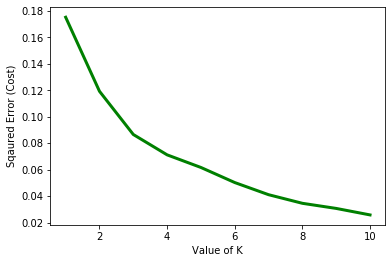

In [456]:
paris_venues_clustering = paris_venues_select_onehot_grouped.drop('BoroughNumber', 1)

cost =[] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i) 
    kmeans.fit(paris_venues_clustering) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(kmeans.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 
  
# the point of the elbow is the  
# most optimal value for choosing k 

We will choose k = 4 for K-Means Clustering.

In [485]:
kclusters = 4
kmeans = KMeans(n_clusters = kclusters)
kmeans.fit(paris_venues_clustering) 
# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 3, 1, 1, 3, 1, 0, 1, 3, 0, 3, 3, 0, 0, 0, 2, 0, 0, 3, 3])

Let's create a new dataframe that includes the cluster as well as the top 10 categories for each borouth.

In [486]:
# add clustering labels
paris_venues_select_sorted_new = paris_venues_select_sorted.copy()

paris_venues_select_sorted_new.insert(0, 'ClusterLabels', kmeans.labels_)

paris_venues_merged = paris_borough

# merge paris_restaurants_sorted with paris_borough to add latitude/longitude for each borough
paris_venues_merged = paris_venues_merged.join(paris_venues_select_sorted_new.set_index('BoroughNumber'), on='BoroughNumber')

paris_venues_merged.head(5) # check the last columns!

,BoroughNumber,BoroughName,Area,Population,PopulationDensity,PostalCode,Latitude,Longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,1,Louvre,1.83,16395,8959.016393,75001,48.8634,2.33677,1,Art and Museum,Plaza,Clothing Store,Outdoors and Nature,Entertainment,Church,Sport
1,2,Bourse,0.99,21042,21254.545455,75002,48.8677,2.34309,3,Entertainment,Clothing Store,Church,Sport,Plaza,Art and Museum,Outdoors and Nature
2,3,Temple,1.17,34389,29392.307692,75003,48.8626,2.35905,1,Art and Museum,Clothing Store,Church,Outdoors and Nature,Sport,Entertainment,Plaza
3,4,Hôtel-de-Ville,1.60,28370,17731.250000,75004,48.8543,2.36147,1,Clothing Store,Outdoors and Nature,Art and Museum,Plaza,Entertainment,Church,Sport
4,5,Panthéon,2.54,59631,23476.771654,75005,48.8454,2.35189,3,Church,Plaza,Entertainment,Art and Museum,Outdoors and Nature,Sport,Clothing Store


Finally, let's visualize the resulting clusters

In [487]:
# create map
map_venues_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]

colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_venues_merged['Latitude'], paris_venues_merged['Longitude'], paris_venues_merged['BoroughNumber'], paris_venues_merged['ClusterLabels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_venues_clusters)
       
map_venues_clusters

['#8000ff', '#2adddd', '#d4dd80', '#ff0000']


#### Examine Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster.

##### Cluster 1

In [488]:
paris_venues_merged.loc[paris_venues_merged['ClusterLabels'] == 0, paris_venues_merged.columns[[0] + list(range(8, paris_venues_merged.shape[1]))]]

,BoroughNumber,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
6,7,0,Art and Museum,Plaza,Outdoors and Nature,Church,Entertainment,Clothing Store,Sport
9,10,0,Outdoors and Nature,Plaza,Clothing Store,Art and Museum,Church,Sport,Entertainment
12,13,0,Clothing Store,Sport,Church,Entertainment,Outdoors and Nature,Plaza,Art and Museum
13,14,0,Sport,Plaza,Outdoors and Nature,Entertainment,Clothing Store,Church,Art and Museum
14,15,0,Sport,Clothing Store,Plaza,Outdoors and Nature,Church,Entertainment,Art and Museum
16,17,0,Plaza,Sport,Church,Outdoors and Nature,Clothing Store,Entertainment,Art and Museum
17,18,0,Church,Sport,Outdoors and Nature,Plaza,Entertainment,Art and Museum,Clothing Store


In this cluster, boroughs are more likely residential boroughs with a lot of sport venues, plaza venues, and churches. 

##### Cluster 2

In [489]:
paris_venues_merged.loc[paris_venues_merged['ClusterLabels'] == 1, paris_venues_merged.columns[[0] + list(range(8, paris_venues_merged.shape[1]))]]

,BoroughNumber,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,1,1,Art and Museum,Plaza,Clothing Store,Outdoors and Nature,Entertainment,Church,Sport
2,3,1,Art and Museum,Clothing Store,Church,Outdoors and Nature,Sport,Entertainment,Plaza
3,4,1,Clothing Store,Outdoors and Nature,Art and Museum,Plaza,Entertainment,Church,Sport
5,6,1,Clothing Store,Entertainment,Outdoors and Nature,Art and Museum,Plaza,Church,Sport
7,8,1,Clothing Store,Art and Museum,Entertainment,Plaza,Church,Sport,Outdoors and Nature


This cluster contains boroughs located in center city with stores, art venues, and museums.

##### Cluster 3

In [490]:
paris_venues_merged.loc[paris_venues_merged['ClusterLabels'] == 2, paris_venues_merged.columns[[0] + list(range(8, paris_venues_merged.shape[1]))]]

,BoroughNumber,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
15,16,2,Sport,Outdoors and Nature,Plaza,Church,Art and Museum,Clothing Store,Entertainment


This cluster contains the borough 16 which is located in the forest with a lot of sport venues, outdoors and nature venues.

##### Cluster 4

In [491]:
paris_venues_merged.loc[paris_venues_merged['ClusterLabels'] == 3, paris_venues_merged.columns[[0] + list(range(8, paris_venues_merged.shape[1]))]]

,BoroughNumber,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
1,2,3,Entertainment,Clothing Store,Church,Sport,Plaza,Art and Museum,Outdoors and Nature
4,5,3,Church,Plaza,Entertainment,Art and Museum,Outdoors and Nature,Sport,Clothing Store
8,9,3,Entertainment,Art and Museum,Sport,Plaza,Church,Clothing Store,Outdoors and Nature
10,11,3,Entertainment,Church,Outdoors and Nature,Sport,Art and Museum,Plaza,Clothing Store
11,12,3,Entertainment,Outdoors and Nature,Sport,Church,Clothing Store,Art and Museum,Plaza
18,19,3,Church,Sport,Entertainment,Outdoors and Nature,Plaza,Art and Museum,Clothing Store
19,20,3,Entertainment,Outdoors and Nature,Plaza,Church,Sport,Clothing Store,Art and Museum


This cluster contains boroughs which provide most entertainment venues in Paris such as concert halls, theaters and music venues.

## Discussion

The results of restaurant recommendations and tourist attractions clustering are rather reasonable. 

According to the study of restaurant recommendation, restaurants for French cuisine, Italian cuisine and Japanese cuisine are evenly distributed in the city. This matches the real situation because those are the most common cuisines in the city. Most Asian restaurants are located in the borough 13, because there are a lot of Asian neighborhoods located in the borough 13. 

According to the study of tourist attractions clustering, the clustering results are able to identify the residential boroughs, entertainment boroughs, and boroughs located in center city with stores, art venues, and museums.
However, there are still several aspects for improvement. The venue data collected from Foursquare API are not always precise on venue categories, which can lead to ambiguous categorization. The venue data collected doesn’t contain the popularity, the size and the number of visitors per year, which may cause the clustering result not accurate enough (e.g., Musée du Louvre attracts far more tourists than other museums, however, all museums have the same weight in the clustering algorithm). Future research can take into consideration of other variables such as popularity, size and number of visitors of each venue. 


## Conclusion

In this project, I analyzed the distribution of the eight most popular cuisine categories in twenty boroughs of Paris, as well as the distribution of tourist attraction venues in Paris. With the help of graphic illustrations, data tables and visualization maps, I made recommendations on both restoration and tourist attractions for tourists with different preferences. I hope this project can be useful for tourists as well as people who are interested in data science. 